# Project: Predicting Boston Housing Prices

## Getting Started

In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a good fit could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

이 프로젝트에선 보스턴의 집들에서 수집한 데이터에 대해 훈련을 받고 테스트 된 모델의 예측 성능을 평가한다. 이 데이터에 대해 잘 훈련 된 모형을 사용하면 주택에 대한 예측, 특히 금전적 가치를 예측할 수 있다. 이 모델은 매일 그러한 정보를 사용할 수 있는 부동산 중개인과 같은 사람에게 매우 중요하다.

The dataset for this project originates from the UCI Machine Learning Repository. The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:

이 프로젝트의 데이터 집합은 [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing)에서 가져왔다. 보스턴 주택 데이터는 1978년에 수집되었으면 506개 항목 각각은 보스턴의 여러 교외 지역 주택에 대한 집계된 데이터를 집계한 것이다. 이 프로젝트의 목적을 위해 다음과 같은 전처리 단계가 데이터 집합에 적용되었다.

- 16 data points have an 'MEDV' value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an 'RM' value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features 'RM', 'LSTAT', 'PTRATIO', and 'MEDV' are essential. The remaining **non-relevant** features have been excluded.
- The feature 'MEDV' has been **multiplicatively scaled** to account for 35 years of market inflation.


- 16 데이터 포인트의 'MEDV' 값은 50.0 이다. 이러한 데이터 포인트에는 누락 또는 검열된 값이 포함되어 제거되었을 수 있다.
- 1 데이터 포인트의 'RM' 값은 8.78 이다. 이 테이터 포인트는 이상치로 간주되어 제거되었다.
- 'RM, 'LSTAT', 'PTRATIO' 및 'MEDV' 기능은 필수적이다. 나머지 비 관련 기능은 제외되었다.
- 'MEDV' 기능은 35 년간의 시장 팽창을 고려하여 배가 된 규모이다.

이 프로젝트에 필요한 Python 라이브러리 몇 개와 함께 Boston housing 데이터 집합을 로드하려면 아래 code cell을 실행하라. 데이터 집합의 크기가 보고되면 성공적으로 로드 된 데이터 집합을 알 수 있다.


In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

c:\users\jeongwhan\anaconda3\envs\mlnd\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
c:\users\jeongwhan\anaconda3\envs\mlnd\lib\site-packages\sklearn\learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration

In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

이 프로젝트의 첫 번째 섹션에서는 보스턴 주택 데이터에 대한 간단한 조사를 하고 여러분의 관찰을 제공할 것이다. 탐색 프로세스를 통해 데이터에 익숙해지는 것이 결과를 더 잘 이해하고 정당화 할 수 있도록 돕는 기본 습관이다.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into features and the target variable. The features, 'RM', 'LSTAT', and 'PTRATIO', give us quantitative information about each data point. The target variable, 'MEDV', will be the variable we seek to predict. These are stored in features and prices, respectively.

이 프로젝트의 주요 목표는 주택 가치를 예측할 수 있는 작업 모델을 만드는 것이므로 데이터 집합을 feature와 타겟 변수로 분리해야 한다. 'RM', 'LSTAT' 및 'PTRATIO' feature들은 각 데이터 요소에 대한 정량적 정보를 제공한다. 타겟 변수 'MEDV'는 우리가 예측하고자 하는 변수가 된다. 그리고 이들은 feature과 가격에 각각 저장된다.


### Implemetation: Calculate Statistics

For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since numpy has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

맨 처음 코드 구현을 위해 보스턴 주택 가격에 대한 기술적 통계를 계산한다. numpy가 이미 import 되었으므로 이 라이브러리를 사용하여 필요한 계산을 수행하라. 이러한 통계는 나중에 구성된 모델의 다양한 예측 결과를 분석하는 데 매우 중요하다.

In the code cell below, you will need to implement the following:


- Calculate the minimum, maximum, mean, median, and standard deviation of 'MEDV', which is stored in prices.
    - Store each calculation in their respective variable.
    
    
- 가격에 저장되는 'MEDV'의 최소, 최대, 평균, 중앙 값 및 표준 편차를 계산한다.
    - 각 계산을 해당 변수에 저장하라.

In [2]:
# TODO: Minimum price of the data
minimum_price = min(prices)

# TODO: Maximum price of the data
maximum_price = max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation

As a reminder, we are using three features from the Boston housing dataset: 'RM', 'LSTAT', and 'PTRATIO'. For each data point (neighborhood):

- 'RM' is the average number of rooms among homes in the neighborhood.
- 'LSTAT' is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- 'PTRATIO' is the ratio of students to teachers in primary and secondary schools in the neighborhood.

다시 말해 보스턴 주택 데이터 집합의 세 가지 feature인 'RM', 'LSTAT', 및 'PTRATIO'를 사용하고 있다. 각 데이터 포인트 (이웃):

- 'RM'은 이웃에 사는 집들 사이의 평균 방의 개수이다.
- 'LSTAT'은 이웃에 거주하는 주택가가 "하급층"(근로 빈곤층)으로 간주되는 비율이다.
- 'PTRATIO'는 이웃에 있는 초등학교와 증학교 교사의 학생 비율이다.

**Using your intuition, for each of the three features above, do you think that an** increase **in the value of that feature would lead to an increase in the value of 'MEDV' or a** decrease **in the value of 'MEDV'? Justify your answer for each.**

**직감을 사용하여 위의 세 가지 feature 각각에 대해 해당 기능의 값이** 증가하면 **'MEDV' 값이 증가하거나 'MEDV' 값이** 낮아질 것**이라고 생각하는가? 각각에 대한 답을 정당화하라.**

**Answer**: 
   - *As the 'RM' value inceases, the 'MEDV' value will increase.*
   
       - *The large number of rooms means that the size of the house is usually large. This means that the average price of the house is likely to increase as the average price is higher.*
   
   
   - *As the 'LSTAT' value increases, the 'MEDV' value will decrease.*
   
       - *In today's society, there is a phenomenon of gentrification. That is, people who are poor go to areas with low house pricies. Therefore, some people may not prefer that area.*
       
       
   - *As the 'PTRATIO' value increases, the 'MEDV' value will decrease.*
       
       - *The more students the teacher manages, the more difficult it is to manage. That is why parents are more likely to send their child to the schools with a low PTRATIO ratio. MEDV will be higher because it will favor the are close to the schools.*
---

## Developing a Model

In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

이 프로젝트의 두 번째 섹션에서는 모델을 예측하는 데 필요한 도구와 기술을 발전할 것이다. 이러한 도구 및 기술을 사용하여 각 모델의 성능을 정확하게 평가할 수 있으므로 예측에 대한 확신이 크게 강화된다.

### Implementation: Define a performance Metric

It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), %R^2%, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions.

주어진 모델의 품질을 측정하는 것은 훈련 및 테스트에 대한 성능을 정량화하지 않고는 어렵다. 일반적으로 오류 유형, 적합성 또는 기타 유용한 측정을 계산하는 성능 메트릭을 사용한다. 이 프로젝트에서는 결정 계수 $R^2$를 계산하여 모델 성능을 계량화한다. 모델에 대한 결정 계수는 회귀 분석에서 유용한 통계이다. 종종 모델이 예측을 어떻게 하는지 잘 설명하기 때문에 회귀 분석에서 유용하다.

The values for $R^2$ range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an $R^2$ of 0 is no better than a model that always predicts the mean of the target variable, whereas a model with an $R^2$ of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. *A model can be given a negative $R^2$ as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable.*

$R^2$의 값 범위는 0에서 1까지이며, **타겟 변수**의 예측 값과 실제 값 사이의 상관관계 제곱을 구한다. $R^2$가 0인 모델은 항상 목표 변수의 평균을 예측하는 모델보다 낫지만 $R^2$가 1인 모델은 목표 변수를 완벽하게 예측한다. 0과 1 사이의 값은 이 모델을 사용하여 타겟 변수의 몇 퍼센트가 **feature**으로 설명될 수 있는지 나타낸다. *모델에는 음의 $R^2$도 주어질 수 있다. 이는 모델이 항상 타겟 변수의 평균을 예측하는 모델보다 **임의적으로 악화**됨을 나타낸다.*

For the performance_metric function in the code cell below, you will need to implement the following:
- Use r2_score from sklearn.metrics to perform a performance calculation between y_true and y_predict.
- Assign the performance score to the score variable.

아래 code sell의 performance_metric 함수의 경우 다음을 구현해야한다:
- sklearn.metrics의 r2_score를 사용하여 y_true와 y_predict 사이의 성능 계산을 수행하라.
- score 변수에 성능 점수를 할당하라.

In [3]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit

Assume that a dataset contains five data points and a model made the following predictions for the target variable:

|**True Value**|**Prediction**|
|:------------:|:------------:|
|      3.0     |      0.0     |
|     -0.5     |      0.0     |
|      2.0     |      2.1     |
|      7.0     |      7.8     |
|      4.2     |      5.3     |

Run the code cell below to use the performance_metric function and calculate this model's coefficient of determination.

아래 code cell을 실행하여 performance_metric 함수를 사용하고 이 모델의 결정 계수를 계산하라.

In [4]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


- Would you consider this model to have successfully captured the variation of the target variable?
- Why or why not?

- 이 모델이 타겟 변수의 변화를 성공적으로 포착했다고 생각하는가?
- 그 이유는?

**Answer:** 

| R2 score of 0                     | ~ | R2 score of 1                  |
|:---------------------------------:|:-:|:------------------------------:|
| dependent var cannot be predicted | ~ | dependent var can be predicted |

*I think this model has successfully captured changes in target variables. This is because the value $R^2$ of the coefficient of determination is close to 1. The $R^2$ value close to 1 means that the dependent variable can be predicted from the independent variable. In addition, the range of $R^2$ is 0 to 1.*


### Implementation: Shuffle and Split Data

Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

이번엔 보스턴 주택 데이터 집합을 가져와서 데이터를 훈련 및 테스트 부분 집합으로 나누어야 한다. 일반적으로 데이터는 훈련을 생성할 때 무작위 순서로 섞이며 데이터 집합의 순서에 편차를 없애기 위해 부분 집합을 테스트한다.

For the code cell below, you will need to implement the following:
- Use train_test_split from sklearn.cross_validation to shuffle and split the features and prices data into training and testing sets.
    - Split the data into 80% training and 20% testing.
    -Set the random_state for train_test_split to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to X_train, X_test, y_train, and y_test.

아래의 code cell에서는 다음을 구현해야 한다:
- sklearn.cross_validation의 train_test_split을 사용하여 feature 및 가격 데이터를 training 및 testing 집합으로 섞고 분할한다.
    - 데이터를 80% training 집합과 20% testing 집합으로 나눈다.
    - train_test_split의 random_state를 원하는 값으로 설정한다. 이렇게 하면 결과가 일치한다.
- training과 testing 분할을 X_train, X_test, y_train, y_test에 할당한다.

In [5]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=0)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing

- What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

- 학습 알고리즘에 대한 학습 및 테스트 부분 집합의 비율로 데이터 집합을 분할하면 어떤 이점이 있는가?

**Answer:** 
- *If I train the model by putting all of the datasets int it, it is difficult to determine wheter it is *under-fitting* or a *generalized-fitting* or a *over-fitting* *.
    - *The problem is that as the training is done, the error rate tents to decrease, so eventually it is *over-fitting*. If the training is not interrupted in the *generalized-fitting* interval in the middle, *over-fitting* does not occur. However, if you use all the data you have in the training set, you will not know where to stop the training. In this sense, the need for a training set begins.*


- *train_test_split randomly divides the data. Suppose that when the data is randomly split, the training set contains only those samples that are difficult to classify. In this case, the test set contains only samples that are easy to classify, so the accuracy of the test set will be unrealistically high. Conversely, if all of the samples that are difficult to classify are entered into the test set, they enter exactly once. Each sample belongs to one of the folds, and each fold becomes a test set once. Therefore, in order to increase the score of corss validation, the model should be well generalized for all samples in the dataset. *

---

## Analyzing Model Performance

In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing 'max_depth' parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

이 세 번째 섹션에서는 다양한 모델의 교육 데이터에 대한 여러 모델의 학습 및 테스트 수행을 살펴볼 것이다. 또한 전체 training 집합에서 'max_depth' 매개 변수가 증가하는 특정 알고리즘을 조사하여 모델 복잡성이 성능에 미치는 영향을 관찰한다. 다양한 기준에 따라 모델의 성과를 그래프로 나타내면 결과만으로는 명확하지 않은 동작을 시각화하는 등 분석 프로세스에 도움이 된다.

### Learning Curves

The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using $R^2$, the coefficient of determination.

다음 code cell은 최대 깊이가 다른 네 개의 의사결정 트리 모델 그래프를 생성한다. 각 그래프는 training과 testing 집합 모두에 대한 모델의 학습 곡선을 시각화한다. 학습 곡선의 음영 부분은 해당 곡선의 불확도를 나타낸다 (표준 편차로 측정). 이 모델은 결정 계수인 $R^2$를 사용하여 training 및 testing 집합 모두에서 그래프가 그려진다.

Run the code cell below and use these graphs to answer the following question.

아래 code cell을 실행하고 이 그래프들을 이용하여 다음 질문에 답하여라.

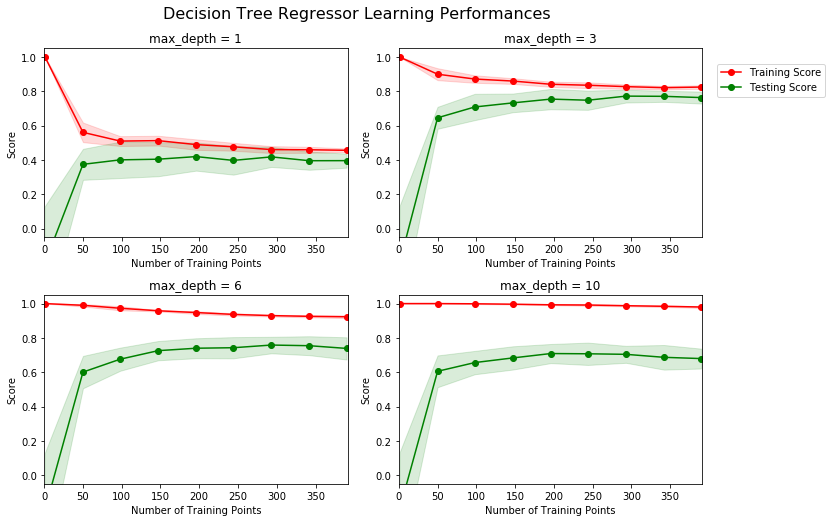

In [6]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data

- Choose one of the graphs above and state the maximum depth for the model.
- What happens to the score of the training curve as more training points are added? What about the testing curve?
- Would having more training points benefit the model?

- 위의 그래프 중 하나를 선택하고 모델의 최대 깊이를 명시하라.
- training 포인트가 추가되면 training 커브의 점수는 어떻게 되는가? testing 곡선은 어떻게 되는가?
- 더 많은 training 포인트가 모델이 도움이 되는가?

**Answer**   
- *The top right graph: max_depth = 3*


- *When training points are added, the points on the training curve and the test curve will converge to the same value(approximately a score of 0.8) as they approach each other.* 
    - *The reason for convergence is that the training score is decreasing little by little (training error is increasing little by little) and the testing socre is increasing little by little (testing error is decreasing little by little).*
    
    
- *More training points help reduce errors. But from a certain point on, there are limits to reducing errors.*
    - *View the graphs above, we can observe a similar phenomenon: all of the testing curves become static and even slightly lower at the training point 400. Therefore, it can be seen that the more data is added, the error rate has a limit to reduce.*


### Complexity Curves

The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the performance_metric function.

다음 code cell은 서로 다른 최대 깊이를 사용하여 학습 데이터에서 학습되고 유효성이 검증된 의사결정 트리 모델에 대한 그래프를 생성한다. 그래프는 두 가지 복잡도 곡선을 생성한다. 하나는 학습용이고 다른 하나는 검증용이다. **학습 곡선**과 유사하게 두 복잡도 곡선의 음영 처리된 영역은 해당 곡선의 불확실성을 나타내며 이 모델은 performance_metric 함수를 사용하여 학습 및 검증 집합에서 점수가 매겨져 그래프가 그려진다.

**Run the code cell below and use this graph to answer the following two questions Q5 and Q6.**

**아래 code cell을 실행하고 이 그래프를 이용해 Q5와 Q6에 답하여라**

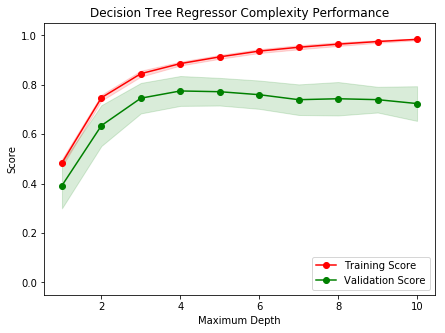

In [7]:
vs.ModelComplexity(X_train, y_train)

### Qustion 5 - Bias-Variance Tradeoff

- When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance?
- How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

- 이 모델을 최대 깊이 1로 훈련시킬 때 모델에 높은 편향 또는 높은 분산이 발생하는가?
- 이 모델의 최대 깊이가 10인 경우 어떤가? 그래프의 시각적 단서는 결론을 정당화하는가?

**Answer**: 
- *When the model is trained with a maximum depth of 1, the model suffer from high bias. Let's compare the maximum depths of 1 and 2. Both maximum depths have little difference between the training score and the verification score, but there is a difference in the score (y-axis) of this model.*
    - *score(when max_depth = 1) $<$ score(when max_depth = 2)   *
    - *Therefore, it can be said that it's the best model when the maximum depth is 2, and it is a model which has high bias when it is 1.*

|Score| 0.0 | ~ |1.0|
|:---:|:---:|:-:|:-:|
|Error|high | ~ |low|
        
    
- *When the model is trained with a maximum depth of 10, the model suffer from high variance.*
    - *The training score is increased (error is lower), but the validation score is decreased (error is highter). It can be seen that the difference between the two scores aleady deviates from the most optimized maximum depth. Therefore, it can be seen that overfitiing, that is, high variance, occurs as the difference between the two scores increases.*



### Question 6 - Best-Guess Optimal Model

- Which maximum depth do you think results in a model that best generalizes to unseen data?
- What intuition lead you to this answer?
- 보이지 않는 데이터를 가장 잘 일반화한 모델의 최대 깊이는 어느 정도라고 생각하는가?
- 어떤 직감이 이 답으로 이끄는가?

**Answers**: 
- I think the best generalized model is the maximum depth of 4.
- The difference between the training score and the verification score is small and the performance score is not low. The important thing is that these two things happen at the same time.

---

## Evaluating Model Performance

In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from fit_model.

프로젝트의 마지막 섹션에서는 fit_model의 최적화된 모델을 사용하여 모델을 구성하고 클라이언트의 feature 집합을 예측한다.

### Question 7 - Grid Search

- What is the grid search technique?
- How it can be applied to optimize a learning algorithm?
- 그리드 탐색이란 무엇인가?
- 학습 알고리즘을 최적화하기 위해 어떻게 적용 할 수 있는가?

**Answers**:
- Grid search is a set of models (a set of models with different parameter values on the grid). And this search is to train each model and evaluate it using cross validation. Then select the model that performed best.

|$γ$ \ kernel| Linear | Polynomial |
|:----------:|:------:|:----------:|
|      0.1   |        |            |
|      1     |        |            |
|     10     |        |            |

- Look at the $F_1$ score of each model and determine the hyper parameters to use for cross validation.

### Question 8 - Corss-Validation

- What is the k-fold cross-validation training technique?
- What benefit does this technique provide for grid search when optimizing a model?
- k-flod 교차 검증 훈련 기법은 무엇인가?
- 이 기법은 모델을 최적화 할 때 그리드 검색에 어떤 이점을 제공하는가?

**Answers**: 

- *The k-fold cross validation techinique can be used with insufficient data. This technique uses (k-1)folds (= (k-1)/k composition ratio) as a training set after dividing the training set k times, and the remaining one fold(= 1/k composition ratio) as the validation set, replacing the corresponding fold of the validation set by round. Using the training set of 4 folds and the validation set of 1 fold, the model training is performed by 5 rounds to select the classification model. The table below is more simplified.*



|         k=5      |  Original Data Set (100%)    |     Round 1     |       Round 2       |      Round 3     |      Round 4     |      Round 5     |
|:-----------------------:|:---------------:|:-------------------:|:----------------:|:----------------:|:----------------:|
|<td rowspan = 5> Training Data Set (80%) | Validation fold |         20%         |                  |                  |                  |
|                         |  Training fold  | 20% Vadlidation fold |                  |                  |                  |
|                         |  Training fold  |         20%         | Vadlidation fold |                  |                  |
|                         |  Training fold  |         20%         |                  | Vadlidation fold |                  |
|                         |  Training fold  |         20%         |                  |                  | Vadlidation fold |



- *Perform this technique k time and calculate the average of the obtained accuracies to determine which hyper-parameters are most suitable. That is, it is advantageous to select the hyper-parameter having the highest $F_1$ score and to select a suitable model (linear model, polynomial model or any $γ$ value).*


## Implementation: Fitting a Model

Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the 'max_depth' parameter for the decision tree. The 'max_depth' parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

최종 구현을 위해서는 **의사결정 트리 알고리즘**을 사용하여 모든 것을 모으고 모델을 훈련시켜야한다. 최적화된 모델을 생성하기 위해 그리드 탐색 기술을 사용하여 모델을 교육하여 의사결정 트리의 'max_depth' 매개 변수를 최적화한다. 'max_depth' 매개 변수는 의사결정 트리 알고리즘이 예측을 하기 전에 데이터에 대해 물어볼 수 있는 질문의 수로 생각할 수 있다. 의사결정 트리는 *지도 학습 알고리즘*이라고하는 알고리즘 클래스의 일부이다.

In addition, you will find your implementation is using ShuffleSplit() for an alternative form of cross-validation (see the 'cv_sets' variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The ShuffleSplit() implementation below will create 10 ('n_splits') shuffled sets, and for each shuffle, 20% ('test_size') of the data will be used as the validation set. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

또한 구현시 교차 검증의 다른 형식인 ShuffleSplit()을 사용하고 있다('cv_sets' 변수 참조). **Question 8**에서 설명하는 K-Fold 교차 검증 기술은 아니지만 이 유형의 교차 검증 기술은 유용하다! 아래의 ShuffleSplit() 구현은 10개의 ('n_splits') 셔플 집합을 만들고 각 셔플에 대해 20%("test_size')의 데이터가 검증 집합으로 사용된다. 구현에 대한 작업을 하는 동안 K-fold 교차 검증 기술과 비교되는 차이와 유사점에 대해 생각해보아라.

Please note that ShuffleSplit has different parameters in scikit-learn versions 0.17 and 0.18. For the fit_model function in the code cell below, you will need to implement the following:

ShuffleSplit에는 scikit-learn 0.17 및 0.18 버전의 매개 변수가 있다. 아래의 code cell에 있는 fit_model 함수의 경우 다음을 구현해야한다:

- Use [DecisionTreeRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from sklearn.tree to create a decision tree regressor object.
    - Assign this object to the 'regressor' variable.
- Create a dictionary for 'max_depth' with the values from 1 to 10, and assign this to the 'params' variable.
- Use [make_scorer](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from sklearn.metrics to create a scoring function object.
    - Pass the performance_metric function as a parameter to the object.
    - Assign this scoring function to the 'scoring_fnc' variable.
- Use [GridSearchCV](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from sklearn.grid_search to create a grid search object.
    - Pass the variables 'regressor', 'params', 'scoring_fnc', and 'cv_sets' as parameters to the object.
    - Assign the GridSearchCV object to the 'grid' variable.
    
    
- 의사결정 트리 회귀 객체를 생성하려면 sklearn.tree의 [DecisionTreeRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)를 사용하라.
    - 이 객체를 'regressor' 변수에 할당하라
- 1에서 10 사이의 값으로 'max_depth'에 대한 딕셔너리를 만들고 이를 'params' 변수에 할당하라.
- sklearn.metrics의 [make_scorer](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html)을 사용하여 수치를 매기는 함수 객체를 만든다.
    - performance_metric 함수를 매개 변수로 개체에 전달하라.
    - 이 수치 매기는 기능을 'scoring_fnc' 변수에 할당하라.
- sklearn.grid_search의 [GridSearchCV](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html)를 사용하여 그리드 검색 개체를 만든다.
    - 매개 변수로 'regressor', 'params', 'scoring_fnc' 및 'cv_sets' 변수를 객체에 전달한다.
    - GridSearchCV 개체를 'grid' 변수에 할당한다.

In [8]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.metrics import make_scorer
    from sklearn.grid_search import GridSearchCV

    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': range(1,11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(regressor, params, scoring = scoring_fnc, cv = cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

## Making Predictions

Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a decision tree regressor, the model has learned what the best questions to ask about the input data are, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

모델이 주어진 데이터 집합에 대해 학습을 받으면 이제는 새로운 입력 데이터 집합에 대한 예측을 수행하는데 사용할 수 있다. 의사결정 트리 회귀 분석기의 경우 모델은 입력 데이터에 대해 질문할 때 가장 좋은 질문이 무엇인지를 배웠고 **타겟 변수**에 대한 예측으로 응답할 수 있다. 이 예측을 사용하여 모델에서 훈련되지 않은 데이터와 같이 대상 변수의 값을 알 수 었는 데이터에 대한 정보를 얻을 수 있다.


### Question 9 - Optimal Model

- What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?

- 최적의 모델에는 어떤 최대 깊이가 있는가? 이 결과는 **Question 6**의 추측과 어떻게 비교되는가?

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

의사결정 트리 회귀 변수를 학습 데이터에 맞추고 최적의 모델을 생성하려면 아래 code cell을 실행하라.

In [9]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

c:\users\jeongwhan\anaconda3\envs\mlnd\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Parameter 'max_depth' is 4 for the optimal model.


**Answer**: Parameter 'max_depth' is 4 for the optimal model. Fortunately, this result is the same as my guess in Question 6.


### Question 10 - Preedictin Selling Prices

Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

보스턴 지역의 부동산 중개인이 이 모델을 사용하여 고객이 소유하고자하는 주택 가격을 돕고 싶다고 상상해보라. 세 명의 고객으로부터 다음 정보를 수집하였다.

|                 Feature                 | Client 1 | Client 2 | Client 3 |
|:---------------------------------------:|:--------:|:--------:|:--------:|
|      Total number of rooms in home      |  5 rooms |  4 rooms |  8 rooms |
|    Neighborhood poverty level (as %)    |    17%   |    32%   |    3%    |
| Student-teacher ratio of nearby schools |  15-to-1 |  22-to-1 |  12-to-1 |

- What price would you recommend each client sell his/her home at?
- Do these prices seem reasonable given the values for the respective features?

- 각 고객이 집에 어떤 가격으로 판매 할 것을 권하고 싶은가?
- 이 가격은 각 feature의 값을 고려할 때 합리적으로 보이는가?

Run the code block below to have your optimized model make predictions for each client's home.

아래의 code cell을 실행하여 최적화된 모델이 각 고객의 집에 대한 예측을 하도록 하라.

In [10]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $391,183.33
Predicted selling price for Client 2's home: $189,123.53
Predicted selling price for Client 3's home: $942,666.67


**Answer**: 
- *I recommend selling at these prices.*
    1. Predicted selling price for Client 1's home: 391,183.33 USD
    2. Predicted selling price for Client 2's home: 189,123.53 USD
    3. Predicted selling price for Client 3's home: 942,666.67 USD
    
    
- *Reasonablity according to features*
    1. Considering only the number of rooms
        - prices: Clinet 3 $>$ Clinet 1 $>$ Client 2
    2. Considering only the neighbrohood poverty level
        - prices: Clinet 3 $>$ Clinet 1 $>$ Client 2
    3. Considering only the student-teacher ratio of nearby schools
        - prices: Clinet 3 $>$ Clinet 1 $>$ Client 2
        
- Therefore, it seems reasonable considering the value of each feature.

## Sensitivity

An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted.

최적의 모델은 반드시 견고한 모델일 필요는 없다. 때로는 모델이 너무 복잡하거나 새로운 데이터로 충분히 일반화 하기에는 너무 단순하다. 때때로 모델은 주어진 데이터의 구조에 적합하지 않은 학습 알고리즘을 사용할 수 있다. 다른 경우, 데이터 자체가 너무 지저분하거나 모델이 타겟 변수를 적절하게 포착할 수 있도록 너무 적은 샘플을 포함할 수 있다. 즉, 모델이 부적합하다.

**Run the code cell below to run the fit_model function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.**

**아래의 code cell을 실행하여 다른 training 및 testing 집합으로 fit_model 함수를 10회 실행하여 학습을 한 데이터와 관련하여 특정 고객의 예측이 어떻게 변경되는지 확인하라.**

In [11]:
vs.PredictTrials(features, prices, fit_model, client_data)


Trial 1: $391,183.33
Trial 2: $424,935.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $73,357.39


### Question 11 - Applicability

- In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.
 
- 몇 문장으로, 구성된 모델이 실제 환경에서 사용되어야 하는지 사용되어서는 안되는지에 대해 논의하라.

**Answer**: *I think this model is not suitable for use in a real evvironment.*
- First of all, this data was collected in 1978, and the price is differnet from the past 40 years. In other words, the value of the dollar has changed. There is the [inflation calculator](http://www.usinflationcalculator.com/) to know about the price change. So to use this mode, we need to collect new data for 2017.

|              |                              |    USD    |
|:------------:|:----------------------------:|:---------:|
|  If in 1978  |   I purchased an item for    | USD 20.00 |
| then in 2017 |  that same item would cost:  | USD 75.14 |
|Cumulative rate of inflation:<td colspan=1>  |   257.7%  |

- This model should take into account the size of the room as well as the number of rooms. This will lead to more accurate predicted prices.

- However, neighborhood poverty level seems to be an appropriate feature. Sometimes people with high incomes like [gentrification](https://en.wikipedia.org/wiki/Gentrification) occur frequently. In other words, people with low income may go to places with low house prices.

- And the student-teache ratio of nearby schools is considered to be a non-specific feature. The school will have a different student-teacher ratio depending on the school, which is not appropriate to associate with house prices.